In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar el archivo
# Indicamos que la columna 'timestamp' debe ser parseada como fecha.
try:
    df = pd.read_csv("btc_data.csv", parse_dates=['timestamp'])
except FileNotFoundError:
    print("Error: Asegúrate de que 'btc_data.csv' esté en el mismo directorio.")
    exit()

# 2. Establecer 'timestamp' como índice (fundamental para series temporales)
df = df.set_index('timestamp')


--- Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7417613 entries, 2011-08-18 12:37:00 to 2025-09-24 15:29:00
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   open            float64
 1   close           float64
 2   volume          float64
 3   unix_timestamp  int64  
 4   high            float64
 5   low             float64
dtypes: float64(5), int64(1)
memory usage: 396.1 MB

Primeros registros:
                     open  close    volume  unix_timestamp  high   low
timestamp                                                             
2011-08-18 12:37:00  10.9   10.9  0.489908      1313671020  10.9  10.9
2011-08-18 12:38:00  10.9   10.9  0.000000      1313671080  10.9  10.9
2011-08-18 12:39:00  10.9   10.9  0.000000      1313671140  10.9  10.9
2011-08-18 12:40:00  10.9   10.9  0.000000      1313671200  10.9  10.9
2011-08-18 12:41:00  10.9   10.9  0.000000      1313671260  10.9  10.9


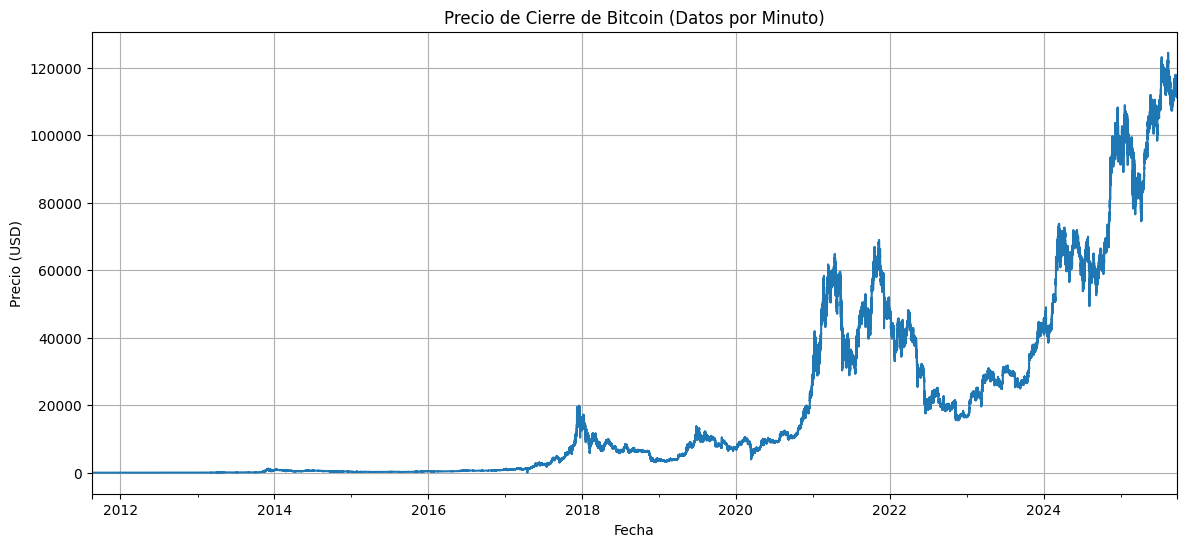

In [7]:
# 3. Mostrar la estructura inicial (opcional, pero útil)
print("--- Información del DataFrame ---")
df.info()
print("\nPrimeros registros:")
print(df.head())

# 4. Generar el gráfico de la serie temporal (Precio de Cierre)
plt.figure(figsize=(14, 6))
# Graficamos el precio de cierre, que es el objetivo de predicción principal
df['close'].plot(title='Precio de Cierre de Bitcoin (Datos por Minuto)', grid=True)
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.show()

--- Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7417613 entries, 2011-08-18 12:37:00 to 2025-09-24 15:29:00
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   open            float64
 1   close           float64
 2   volume          float64
 3   unix_timestamp  int64  
 4   high            float64
 5   low             float64
dtypes: float64(5), int64(1)
memory usage: 396.1 MB

Primeros registros:
                     open  close    volume  unix_timestamp  high   low
timestamp                                                             
2011-08-18 12:37:00  10.9   10.9  0.489908      1313671020  10.9  10.9
2011-08-18 12:38:00  10.9   10.9  0.000000      1313671080  10.9  10.9
2011-08-18 12:39:00  10.9   10.9  0.000000      1313671140  10.9  10.9
2011-08-18 12:40:00  10.9   10.9  0.000000      1313671200  10.9  10.9
2011-08-18 12:41:00  10.9   10.9  0.000000      1313671260  10.9  10.9
-------------------

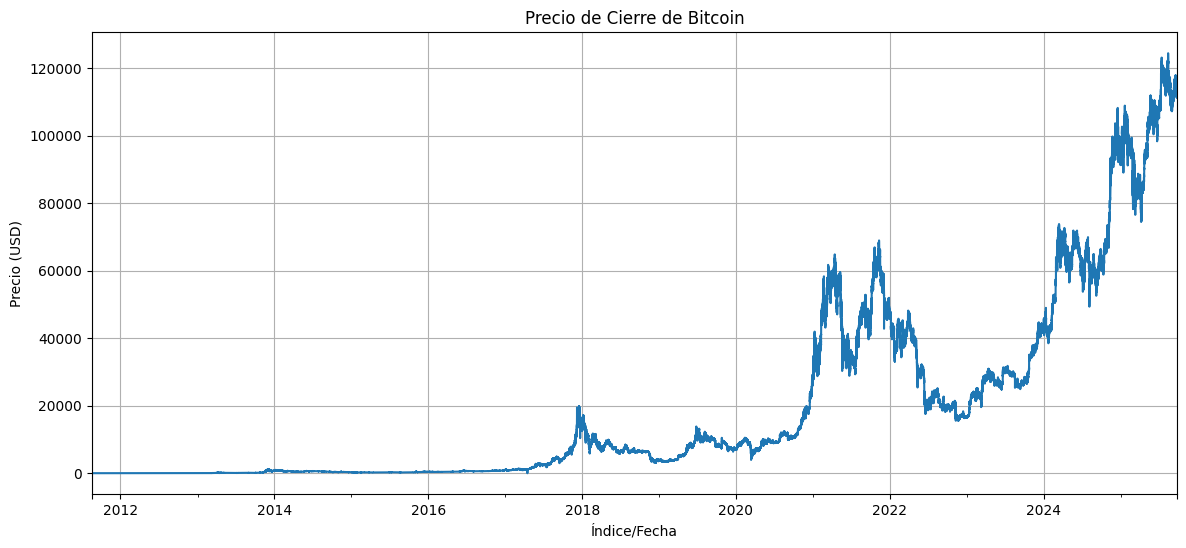

In [10]:
def analizar_y_graficar_df(df: pd.DataFrame, titulo_grafico: str = 'Precio de Cierre (Serie Temporal)'):
    print("--- Información del DataFrame ---")
    df.info()
    print("\nPrimeros registros:")
    print(df.head())
    print("---------------------------------")
    
    if 'close' in df.columns:
        plt.figure(figsize=(14, 6))
        # Graficamos el precio de cierre
        df['close'].plot(title=titulo_grafico, grid=True)
        plt.xlabel("Índice/Fecha") # Usamos 'Índice/Fecha' ya que no sabemos si el índice es datetime
        plt.ylabel("Precio (USD)")
        plt.show()
    else:
        print("\n Advertencia: La columna 'close' no se encontró en el DataFrame para graficar.")
        
analizar_y_graficar_df(df, titulo_grafico='Precio de Cierre de Bitcoin')


A. ✂️ Desestimar Datos Antiguos (Recorte Temporal)
Es correcto y muy recomendable desestimar los años iniciales.

El comportamiento de Bitcoin antes de 2017 o incluso 2019 era muy diferente (menor liquidez, menos adopción institucional) comparado con el mercado actual. Estos datos "estáticos" pueden confundir los modelos (LSTM/GRU) con patrones irrelevantes para la predicción moderna.


Se decide comenzar el dataset en un punto donde la volatilidad y la liquidez aumentaron significativamente. 
Por ejemplo, empezar en enero de 2018 (después del primer gran bull run) o en enero de 2020 (antes de la pandemia y la posterior explosión de precios).

Dataset recortado, ahora inicia en: 2020-01-01 00:00:00
--- Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3014850 entries, 2020-01-01 00:00:00 to 2025-09-24 15:29:00
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   open            float64
 1   close           float64
 2   volume          float64
 3   unix_timestamp  int64  
 4   high            float64
 5   low             float64
dtypes: float64(5), int64(1)
memory usage: 161.0 MB

Primeros registros:
                        open    close     volume  unix_timestamp     high  \
timestamp                                                                   
2020-01-01 00:00:00  7165.72  7158.01   7.623856      1577836800  7165.72   
2020-01-01 00:01:00  7158.01  7154.84  20.386676      1577836860  7160.18   
2020-01-01 00:02:00  7156.07  7158.65   5.283010      1577836920  7158.65   
2020-01-01 00:03:00  7158.51  7161.73   1.027215      1577836980  7161.78  

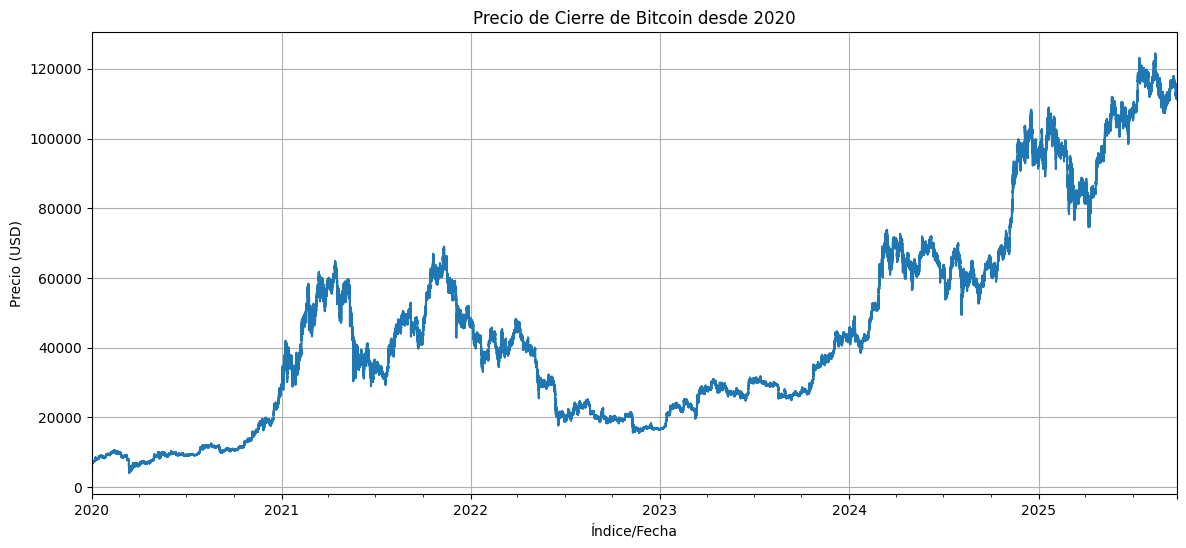

In [11]:
# Ejemplo de recorte: Iniciar desde Enero de 2020
df_recortado = df.loc['2020-01-01':]
print(f"Dataset recortado, ahora inicia en: {df_recortado.index.min()}")

analizar_y_graficar_df(df_recortado, titulo_grafico='Precio de Cierre de Bitcoin desde 2020')

In [14]:
# Remuestreo a Datos Diarios ('D')
df_diario = df_recortado.resample('D').agg({
    'open': 'first',      # Primer precio del día es el Open
    'high': 'max',        # Máximo precio del día
    'low': 'min',         # Mínimo precio del día
    'close': 'last',      # Último precio del día es el Close
    'volume': 'sum'       # Suma de volumen de todo el día
}).dropna() # Eliminamos días donde no hubo trading

print("\n--- DataFrame Diario Remuestreado ---")
print(df_diario.head())


# Remuestreo a Datos por hora ('h')
df_porHora = df_recortado.resample('h').agg({
    'open': 'first',      # Primer precio del día es el Open
    'high': 'max',        # Máximo precio del día
    'low': 'min',         # Mínimo precio del día
    'close': 'last',      # Último precio del día es el Close
    'volume': 'sum'       # Suma de volumen de todo el día
}).dropna() # Eliminamos días donde no hubo trading

print("\n--- DataFrame por Hora Remuestreado ---")
print(df_porHora.head())



--- DataFrame Diario Remuestreado ---
               open     high      low    close        volume
timestamp                                                   
2020-01-01  7165.72  7238.14  7136.05  7174.33   3350.630049
2020-01-02  7174.33  7186.18  6903.00  6945.02   8010.927387
2020-01-03  6945.02  7401.20  6854.67  7334.45  14056.392385
2020-01-04  7334.45  7398.00  7263.32  7348.63   4742.466210
2020-01-05  7348.63  7488.87  7312.22  7355.40   5942.014946

--- DataFrame por Hora Remuestreado ---
                        open     high      low    close      volume
timestamp                                                          
2020-01-01 00:00:00  7165.72  7165.72  7136.05  7150.35  250.849812
2020-01-01 01:00:00  7149.26  7204.94  7147.18  7194.52  232.203269
2020-01-01 02:00:00  7194.52  7218.42  7191.44  7217.00  189.937903
2020-01-01 03:00:00  7217.00  7217.00  7193.34  7196.98  234.739781
2020-01-01 04:00:00  7196.99  7200.62  7183.85  7186.41  205.908729


Para implementar esta arquitectura, necesitarás generar tres DataFrames a partir de tu archivo original btc_data.csv, cada uno con la granularidad deseada:
 
    Para el modelo de Días:
        Remuestreo (Resampling): De minutos a días (.resample('D')).
        Ventana de Tiempo: Por ejemplo, 180 o 365 días para entrenar.

    Para el modelo de Horas:
        Remuestreo (Resampling): De minutos a horas (.resample('H')).
        Ventana de Tiempo: 3 semanas de datos por hora (ej. 3 x 7 x 24 = 504 horas).

    Para el modelo de Minutos:
        Datos Crudos: Puedes usar los datos crudos o hacer un remuestreo ligero (ej. a 5 minutos) si la granularidad de 1 minuto es demasiado ruidosa.
        Ventana de Tiempo: 3 días de datos por minuto (ej. 3 x 24 x 60 = 4320 minutos).




2. Implementación de Modelos (LSTM/GRU)
Para cada granularidad, entrenarías tu par de modelos recurrentes (LSTM y GRU), resultando en seis modelos en total:

Día: LSTM_Día vs GRU_Día

Hora: LSTM_Hora vs GRU_Hora

Minuto: LSTM_Minuto vs GRU_Minuto

In [ ]:
''' 
3.  Estrategias de Complemento (Ensemble)
    La clave de este enfoque es cómo combinas las predicciones de los módulos (el "complemento").
    
Hay dos formas principales de hacerlo:
    A. Estrategia de Stackeo (Stacking)
        Este es el enfoque más avanzado para hacer que las IAs se complementen.
        Cada modelo (LSTM_Día, GRU_Día, LSTM_Hora, etc.) genera su propia predicción
        para el futuro (ej. el precio de mañana).
        Se utiliza un Modelo Final (Meta-Learner), que puede ser una regresión lineal 
        simple o una red neuronal más pequeña, que toma las predicciones de todos los 
        modelos como entradas y genera la predicción final.
        Entradas del Meta-Learner:      [P_LSTM_Día, P_GRU_Día, P_LSTM_Hora, ...]
        Salida del Meta-Learner: PFinal
    
    B. Estrategia de Predicción Múltiple (Input Concatenation)
        Una forma más sencilla es usar las predicciones del modelo de mayor plazo como 
        una característica de entrada para el modelo de plazo más corto.
        El Modelo de Hora usa sus datos por hora más la predicción (o feature map) del Modelo de Día como una entrada adicional.
        El Modelo de Minuto usa sus datos por minuto más las predicciones del Modelo de Día y el Modelo de Hora.
        Este enfoque obliga al modelo de corto plazo a "tomar en cuenta" la tendencia general que ha aprendido el modelo de largo plazo.

'''


In [15]:
#Reserva de Datos para Testeo Final
#Guardo 2025 para testeo final
punto_corte = '2025-01-01'

df_train_val = df_diario.loc[:punto_corte].iloc[:-1] # Hasta antes de 2025-01-01
df_test_final = df_diario.loc[punto_corte:]       # Desde 2025-01-01 en adelante  

print("--- División del Dataset ---")
print(f"Inicio del Set de Entrenamiento/Validación: {df_train_val.index.min()}")
print(f"Fin del Set de Entrenamiento/Validación: {df_train_val.index.max()} ({len(df_train_val)} días)")
print("-" * 30)
print(f"Inicio del Set de Testeo Final: {df_test_final.index.min()}")
print(f"Fin del Set de Testeo Final: {df_test_final.index.max()} ({len(df_test_final)} días)")

--- División del Dataset ---
Inicio del Set de Entrenamiento/Validación: 2020-01-01 00:00:00
Fin del Set de Entrenamiento/Validación: 2024-12-31 00:00:00 (1827 días)
------------------------------
Inicio del Set de Testeo Final: 2025-01-01 00:00:00
Fin del Set de Testeo Final: 2025-09-24 00:00:00 (267 días)


In [24]:
#Escalado y Normalización (MinMaxScaler)
#Las redes neuronales recurrentes funcionan mucho mejor cuando las entradas están normalizadas, generalmente en el rango [0, 1]
from sklearn.preprocessing import MinMaxScaler

df_train_val['volatilidad'] = df_train_val['high'] - df_train_val['low']    # 1. Crear la característica de Volatilidad (High - Low)
#analizar_y_graficar_df(df_train_val, titulo_grafico='Precio de Bitcoin desde 2020 hasta 2025')



features = ['open', 'high', 'low', 'close', 'volume', 'volatilidad']    # 2. Seleccionar las columnas que vamos a usar como características (features)
data = df_train_val[features].values    # Es mejor usar Open, High, Low, Close, Volume, y la Volatilidad que creamos.  
                                        # Convertir a array de NumPy

scaler = MinMaxScaler(feature_range=(0, 1))     # 3. Inicializar y Ajustar el Escalador (SOLO en los datos de entrenamiento)
scaled_data = scaler.fit_transform(data)

print("\n--- Escalado de Datos ---")
print(f"Forma del Array escalado: {scaled_data.shape}")     #(1827,6) 1827 días y 6 features
print(f"Valores máximos después del escalado: {scaled_data.max(axis=0)}")



--- Escalado de Datos ---
Forma del Array escalado: (1827, 6)
Valores máximos después del escalado: [1. 1. 1. 1. 1. 1.]


In [25]:
#Creación de Secuencias Temporales (X e Y)
# En este paso convertiremos la serie temporal continua en muestras de entrenamiento 
#   con un tamaño de ventana (timestep).
# 
# Para el modelo de días,   usaremos una ventana grande de 60 días de datos pasados 
#                                      para predecir el precio de cierre del día 61.
# 
# X (Features/Entrada): Muestra de 60 días (60, 6 características)
# 
# Y (Label/Salida): El precio de cierre del día siguiente (1 valor)

import numpy as np

# Definir la ventana de tiempo (timestep)
TIMESTEP = 60

# Listas para almacenar las secuencias
X_train = []
Y_train = []

# Iterar sobre el array escalado para crear las secuencias
for i in range(TIMESTEP, len(scaled_data)):
    # X_train contendrá los 60 valores anteriores (días i-60 hasta i-1)
    X_train.append(scaled_data[i-TIMESTEP:i, :]) 
    
    # Y_train contendrá el precio de CIERRE del día actual (día i). 
    # El precio de cierre es la 4ta columna (índice 3) en nuestra lista 'features'.
    Y_train.append(scaled_data[i, features.index('close')])

# Convertir las listas a arreglos de NumPy
X_train, Y_train = np.array(X_train), np.array(Y_train)

# La forma de X_train debe ser: (Número de muestras, Timestep, Número de Características)
print("\n--- Creación de Secuencias para RNN ---")
print(f"Forma de X_train (muestras, pasos de tiempo, features): {X_train.shape}")
print(f"Forma de Y_train (muestras, valor a predecir): {Y_train.shape}")


--- Creación de Secuencias para RNN ---
Forma de X_train (muestras, pasos de tiempo, features): (1767, 60, 6)
Forma de Y_train (muestras, valor a predecir): (1767,)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,GRU


In [31]:
#Modelo LSTM:
# Una capa recurrente con 50 unidades
# Una capa de Dropout para prevenir el sobreajuste.
# Una capa Densa (Dense) de salida con 1 unidad, 
#       utilizando activación lineal, ya que es una tarea de regresión 
#       (prediciendo un valor continuo: el precio).

def crear_modelo_lstm(input_shape):
    """Define y compila el modelo LSTM."""
    
    # El input_shape debe ser (TIMESTEP, features) -> (60, 6)
    model = Sequential()
    
    # Capa LSTM
    model.add(LSTM(
        units=50, 
        return_sequences=False, # False porque solo nos interesa la salida del último paso de tiempo
        input_shape=input_shape
    ))
    
    # Capa de Dropout (para regularización)
    model.add(Dropout(0.2))
    
    # Capa de Salida (Predicción de 1 valor: Precio de Cierre)
    model.add(Dense(units=1))
    
    # Compilación: Usamos 'adam' como optimizador y 'mean_squared_error' (MSE) como métrica
    # MSE es común en tareas de regresión.
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model


In [32]:
#Modelo GRU

def crear_modelo_gru(input_shape):
    """Define y compila el modelo GRU."""
    
    model = Sequential()
    
    # Capa GRU
    model.add(GRU(
        units=50, 
        return_sequences=False, 
        input_shape=input_shape
    ))
    
    # Capa de Dropout
    model.add(Dropout(0.2))
    
    # Capa de Salida
    model.add(Dense(units=1))
    
    # Compilación
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

In [36]:
#Entrenamiento y Comparación Inicial

# Definir la forma de entrada: (Timesteps, Features)
# En este caso: (60, 6)
input_shape = (X_train.shape[1], X_train.shape[2]) 

# 1. Crear Modelos
modelo_lstm = crear_modelo_lstm(input_shape)
#modelo_gru = crear_modelo_gru(input_shape)

print("--- Resumen del Modelo LSTM ---")
modelo_lstm.summary()

#print("\n--- Resumen del Modelo GRU ---")
#modelo_gru.summary()

print("\n--- Iniciando Entrenamiento LSTM ---")
history_lstm = modelo_lstm.fit(
    X_train, 
    Y_train, 
    epochs=25,        # Número de pasadas de entrenamiento
    batch_size=32,    # Tamaño de lote
    validation_split=0.2, 
    verbose=1
)

--- Resumen del Modelo LSTM ---


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 50)             │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,451 (44.73 KB)

 Trainable params: 11,451 (44.73 KB)

 Non-trainable params: 0 (0.00 B)


--- Iniciando Entrenamiento LSTM ---
Epoch 1/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0130 - val_loss: 0.0020
Epoch 2/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 3/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 4/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 5/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 6/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 7/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.9326e-04 - val_loss: 0.0016
Epoch 8/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.6854e-04 - val_loss: 0.0013
Epoch 9/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.8472e-04 - val_loss: 0.0011
Epoch 10/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.9758e-04 - val_loss: 0.0013
Epoch 11/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.3904e-04 - val_loss: 9.6965e-04
E

--- Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 267 entries, 2025-01-01 to 2025-09-24
Freq: D
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         267 non-null    float64
 1   high         267 non-null    float64
 2   low          267 non-null    float64
 3   close        267 non-null    float64
 4   volume       267 non-null    float64
 5   volatilidad  267 non-null    float64
dtypes: float64(6)
memory usage: 22.7 KB

Primeros registros:
                open      high       low     close        volume  volatilidad
timestamp                                                                    
2025-01-01  93347.59  94960.91  92743.63  94383.59   6871.738482      2217.28
2025-01-02  94383.59  97776.99  94177.00  96903.19  10912.473840      3599.99
2025-01-03  96905.48  98969.92  96016.63  98136.51   9021.885382      2953.29
2025-01-04  98139.85  98761.02  97516.65  98209

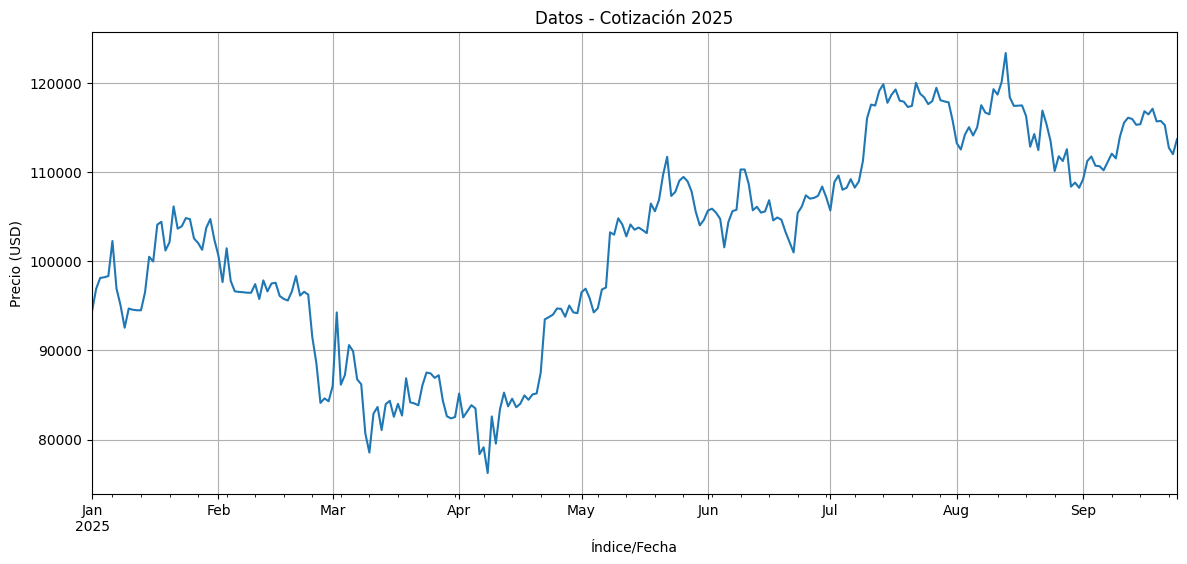

--- Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2024-12-01 to 2024-12-31
Freq: D
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         31 non-null     float64
 1   high         31 non-null     float64
 2   low          31 non-null     float64
 3   close        31 non-null     float64
 4   volume       31 non-null     float64
 5   volatilidad  31 non-null     float64
dtypes: float64(6)
memory usage: 1.7 KB

Primeros registros:
                open      high       low     close        volume  volatilidad
timestamp                                                                    
2024-12-01  96464.95   97895.9  95753.42  97263.18   4039.275915      2142.48
2024-12-02  97259.17   98200.0  94400.63  95862.89  15554.614867      3799.37
2024-12-03  95862.89   96310.1  93571.30  95924.52  17898.704621      2738.80
2024-12-04  95924.85   99263.2  94634.85  98746.2

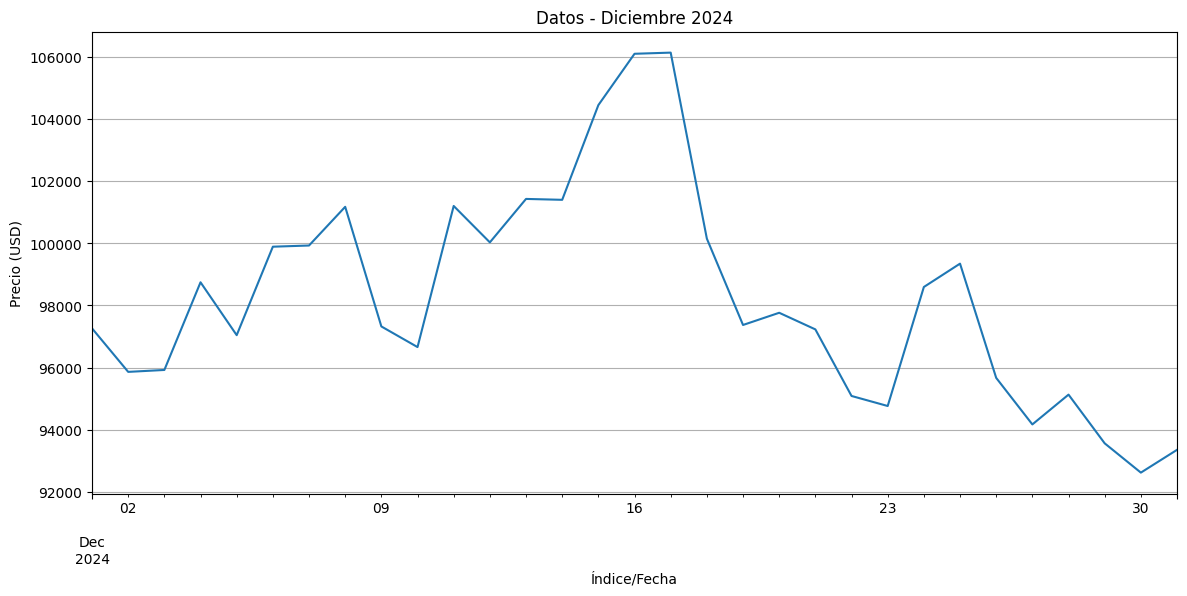

--- Información del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2025-01-01 to 2025-01-31
Freq: D
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         31 non-null     float64
 1   high         31 non-null     float64
 2   low          31 non-null     float64
 3   close        31 non-null     float64
 4   volume       31 non-null     float64
 5   volatilidad  31 non-null     float64
dtypes: float64(6)
memory usage: 1.7 KB

Primeros registros:
                open      high       low     close        volume  volatilidad
timestamp                                                                    
2025-01-01  93347.59  94960.91  92743.63  94383.59   6871.738482      2217.28
2025-01-02  94383.59  97776.99  94177.00  96903.19  10912.473840      3599.99
2025-01-03  96905.48  98969.92  96016.63  98136.51   9021.885382      2953.29
2025-01-04  98139.85  98761.02  97516.65  98209.8

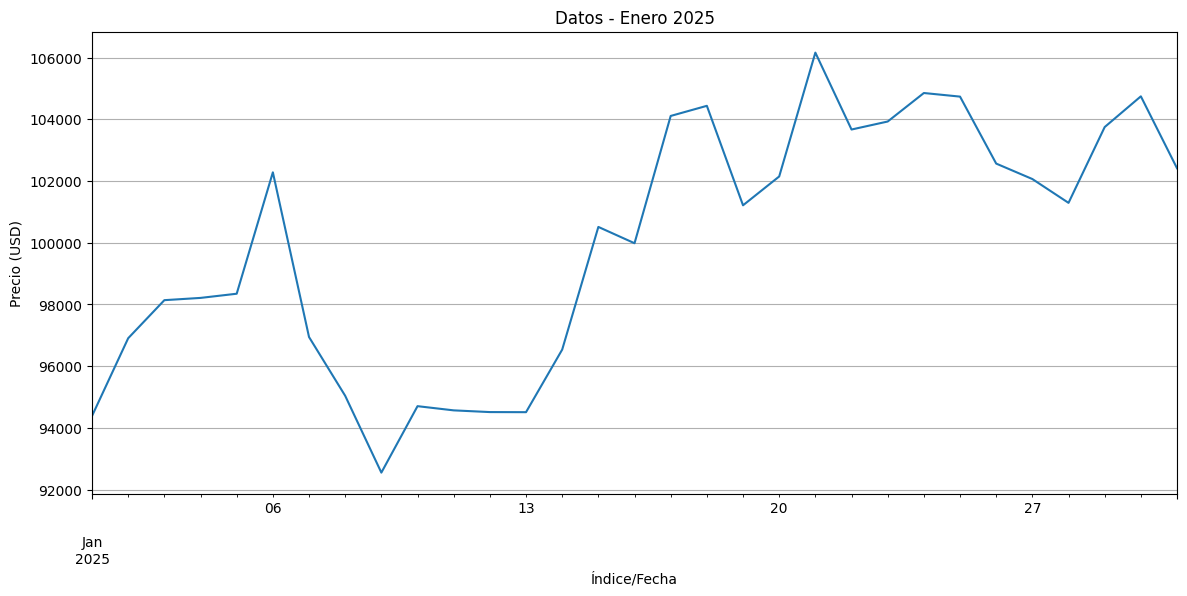

In [53]:
#df_test_final
analizar_y_graficar_df(df_test_final, titulo_grafico='Datos - Cotización 2025')

df_diciembre_24 = df_train_val.loc['2024-12-01':'2024-12-31']
analizar_y_graficar_df(df_diciembre_24, titulo_grafico='Datos - Diciembre 2024')


df_enero_25 = df_test_final.loc['2025-01-01':'2025-01-31']       # Desde 2025-01-01 en adelante  
analizar_y_graficar_df(df_enero_25, titulo_grafico='Datos - Enero 2025')



In [46]:
#Predicción del Precio para 2025 (df_test_final)
#Para predecir los valores de 2025:
#   1)Preparar los datos de 2025: Deben tener exactamente el mismo formato  
#               (escalado, ventana de 60 días) que los datos de entrenamiento.
#   2)Predecir: Pasar estos datos al modelo (modelo_lstm.predict()).
#   3)Desescalar: Convertir la predicción (que está entre 0 y 1) de vuelta a precios reales en dólares.

In [42]:
#   1)Preparar los datos de 2025: Deben tener exactamente el mismo formato  
#               (escalado, ventana de 60 días) que los datos de entrenamiento.


#Crear la característica de Volatilidad en el dataset final también
df_test_final['volatilidad'] = df_test_final['high'] - df_test_final['low']

# Concatenamos el final de df_train_val con df_test_final
# Esto es necesario para poder crear la primera ventana de 60 días en el set de testeo.
# Usamos los 60 días anteriores al inicio de 2025.
dataset_completo = pd.concat((df_train_val[features].iloc[-TIMESTEP:], df_test_final[features]), axis=0)

# Escalamos el conjunto completo de prueba usando el *mismo* escalador ajustado ANTES.
# ¡Importante!: Usamos scaler.transform(), NUNCA scaler.fit_transform() aquí.
data_test = dataset_completo[features].values
scaled_test_data = scaler.transform(data_test)

# Creamos la estructura X_test (secuencias de 60 días)
X_test = []
# Iteramos SÓLO sobre la longitud del dataset final
for i in range(TIMESTEP, len(scaled_test_data)):
    X_test.append(scaled_test_data[i-TIMESTEP:i, :])

X_test = np.array(X_test)

print(f"\nForma de X_test (muestras de 2025, 60, 6): {X_test.shape}")


Forma de X_test (muestras de 2025, 60, 6): (267, 60, 6)


C:\Users\crges\AppData\Local\Temp\ipykernel_684\4285431909.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_final['volatilidad'] = df_test_final['high'] - df_test_final['low']


In [43]:

#   2)Predecir: Pasar estos datos al modelo (modelo_lstm.predict()).
# Generamos las predicciones escaladas (entre 0 y 1)
predictions_scaled = modelo_lstm.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [57]:
#   3)Desescalar: Convertir la predicción (que está entre 0 y 1) de vuelta a precios reales en dólares.
# 1. Crear un array fantasma para el desescalado
# El array debe tener la forma (Número de predicciones, Número de Features) -> (N, 6)
dummy_array = np.zeros(shape=(len(predictions_scaled), len(features)))

# 2. Colocar las predicciones escaladas en la columna de 'close' (índice 3)
close_idx = features.index('close')
dummy_array[:, close_idx] = predictions_scaled[:, 0]

# 3. Desescalar todo el array fantasma
predictions_descaled = scaler.inverse_transform(dummy_array)

# 4. Obtener las predicciones reales (solo la columna 'close')
precios_predichos_reales = predictions_descaled[:, close_idx]

print("\n--- Resultados de la Predicción ---")
print(f"Predicciones desescaladas (precios reales en USD): {precios_predichos_reales[:5]}")
print(f"Predicciones desescaladas (precios reales en USD): {precios_predichos_reales[:31]}")


--- Resultados de la Predicción ---
Predicciones desescaladas (precios reales en USD): [90345.1670655  90414.6983735  91247.05779433 92515.30692043
 93868.378447  ]
Predicciones desescaladas (precios reales en USD): [ 90345.1670655   90414.6983735   91247.05779433  92515.30692043
  93868.378447    94832.46583031  95938.10900813  95368.54146954
  93601.78944783  91811.30695453  90969.51209053  91111.53875169
  91365.96369584  90540.35940035  91019.50243273  92628.94273756
  94074.55163349  96006.66236233  98161.87936664  98528.59996902
  97777.47711805  98351.39111798  99456.99203854  99657.43634751
 100451.16659315 101420.92248647 101473.96138836  99869.1150517
  99177.65341943  99200.1946509   99850.15965084]


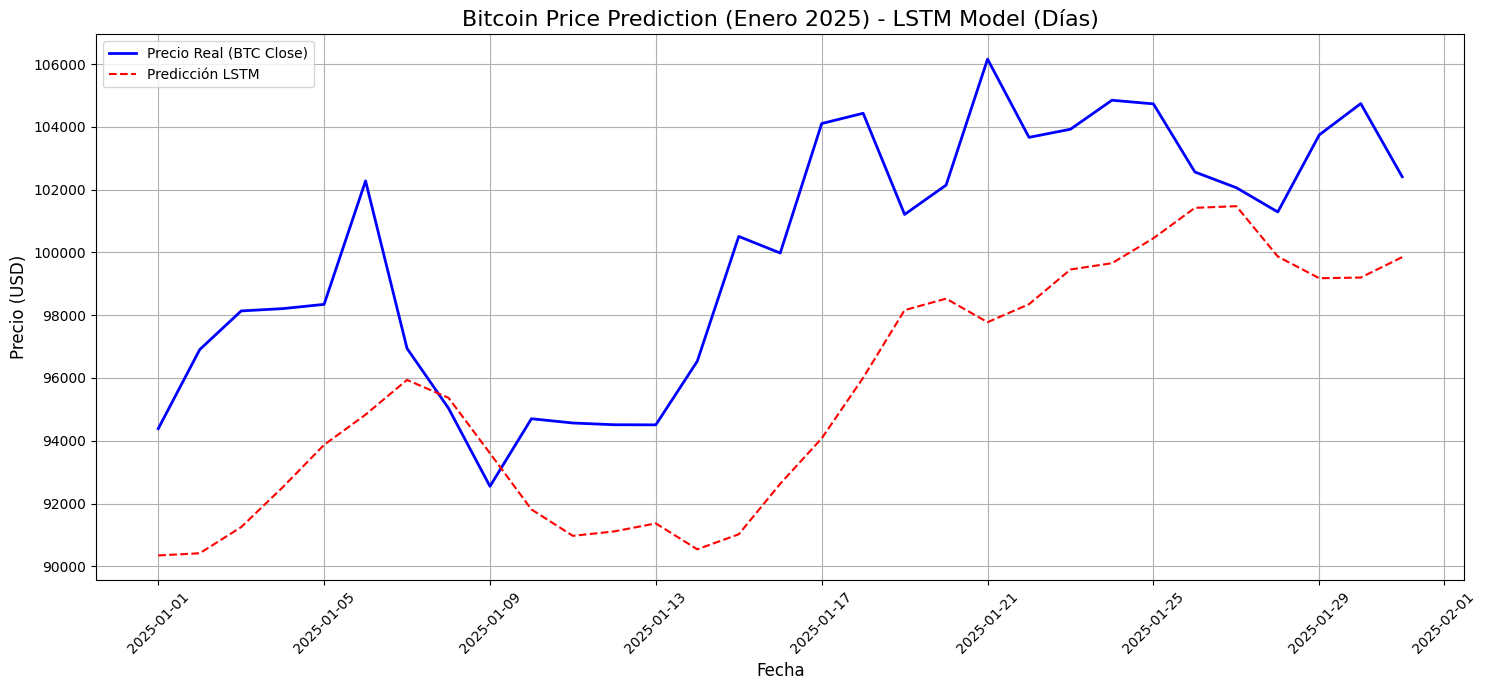

In [58]:
# 1. Obtener el array de precios reales
# El precio de cierre es la columna 'close'.
precios_reales = df_test_final['close'].values

# 2. Recortar ambos arrays (Predichos y Reales) para Enero 2025
# Asumimos que la primera predicción corresponde al primer día de testeo (2025-01-01).
dias_de_enero = 31 

# Nota: X_test se construyó para tener la misma longitud que df_test_final,
# por lo que los precios predichos tienen la misma longitud.

precios_predichos_enero = precios_predichos_reales[:dias_de_enero]
precios_reales_enero = precios_reales[:dias_de_enero]

# 3. Obtener las fechas correspondientes para el eje X
fechas_enero = df_test_final.index[:dias_de_enero]


import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

# Gráfico de los precios reales
plt.plot(fechas_enero, precios_reales_enero, label='Precio Real (BTC Close)', color='blue', linewidth=2)

# Gráfico de la predicción LSTM
plt.plot(fechas_enero, precios_predichos_enero, label='Predicción LSTM', color='red', linestyle='--', linewidth=1.5)

plt.title('Bitcoin Price Prediction (Enero 2025) - LSTM Model (Días)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio (USD)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45) # Rotar las etiquetas del eje X para mejor lectura
plt.tight_layout() # Ajusta el diseño para que todo quepa
plt.show()